In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import random
from scipy.stats import mannwhitneyu as mannU


<h1>Quantifying the evolution of individual scientific impact</h1>

For this exercise you will reproduce results of the paper: Quantifying the evolution
of individual scientific impact.

http://www.robertasinatra.com/pdf/Science_quantifying_aaf5239_Sinatra.pdf

The exercise consists of creating a null model for the distribution of the time of the highest impact paper in scientific careers.


<b>The dataset describing the scientist's careers is as follow:</b>

Careers time: scientist id and a list of time (in days) when his/her papers where published.

Careers cites: scientist id and a list of number of citations each paper received. Note that here we are using the number of citations as a proxy to measure the impact of a paper.

<h1>Read the time the papers were published</h1>

In [2]:
careers_time = pd.read_csv('./careers_time.txt', sep='; ', header=None, engine='python')
careers_time.columns = ['id', 'papers']

#split string into a list of ints
careers_time['papers'] = careers_time.papers.str.split('\t')
careers_time['papers'] = careers_time['papers'].apply(lambda x: [int(i) - int(x[0]) for i in x])

careers_time.head()

,id,papers
0,48,"[0, 455, 1057, 1330, 1687, 1939, 2065, 2492, 2..."
1,64,"[0, 175, 1400, 1492, 2206, 2223, 2407, 2710, 2..."
2,378,"[0, 0, 249, 354, 371, 583, 644, 675, 781, 781,..."
3,476,"[0, 61, 244, 304, 419, 594, 608, 839, 973, 109..."
4,485,"[0, 194, 335, 335, 335, 943, 973, 1218, 1980, ..."


<h1>Read the number of citations each paper received</h1>

In [3]:
careers_cites = pd.read_csv('./careers_cites.txt', sep='; ', header=None, engine='python')
careers_cites.columns = ['id', 'cites']

#split string into a list of ints
careers_cites['cites'] = careers_cites.cites.str.split('\t')
careers_cites['cites'] = careers_cites['cites'].apply(lambda x: [int(i) for i in x])

careers_cites.head()

,id,cites
0,48,"[4, 6, 24, 3, 3, 2, 3, 1, 2, 21, 0, 16, 3, 1, ..."
1,64,"[1, 0, 4, 34, 1, 20, 2, 2, 9, 1, 2, 3, 6, 1, 8..."
2,378,"[2, 5, 7, 3, 1, 0, 4, 5, 5, 12, 4, 32, 12, 4, ..."
3,476,"[0, 6, 8, 8, 5, 7, 4, 2, 0, 1, 7, 0, 2, 6, 4, ..."
4,485,"[13, 6, 16, 16, 11, 6, 14, 2, 0, 6, 21, 32, 41..."


<h1>Create the null model by randomizing the citations counts </h1>

In [4]:
# merge two data sources
df = careers_cites.merge(careers_time, on='id')

# shuffle number of sites
df_null = df.copy()
df_null['cites'].apply(lambda l: random.shuffle(l))

0       None
1       None
2       None
3       None
4       None
        ... 
2882    None
2883    None
2884    None
2885    None
2886    None
Name: cites, Length: 2887, dtype: object

<h1>Plot both distributions: Data and Randomized</h1>

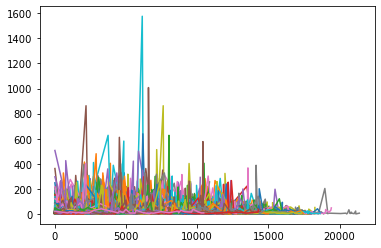

In [5]:
fig, ax = plt.subplots()

for i, row in df.iterrows():
    ax.plot(row['papers'], row['cites'])

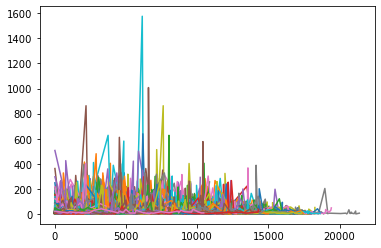

In [6]:
fig, ax = plt.subplots()

for i, row in df_null.iterrows():
    ax.plot(row['papers'], row['cites'])